In [1]:
# Pour visualiser les données j'utilise la bibliothèque Pandas étudiée en DataScience -1
# Importation de pandas
import pandas as pd

# Chargement des données 

In [2]:
# Importation des données
diabetes = pd.read_csv('diabetes.csv', sep = ',')

# Analyse des données - problématique

In [3]:
# Affichage des premières lignes pour voir à quoi ressemble les données
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Affichae des type de données
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
#Affichage de la "shape" 789 lignes et 9 colonnes
diabetes.shape

(768, 9)

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Il y a 9 colonnes, les 8 premières correspondents aux variables d'entrée (covariables, attributs, prédicteurs) la 9 ème est la donnée de sortie (cible) qui est de type binaire (diabétique/non diabétique).

Le but du problème est de déterminer parmi les 8 variables d'entrées celles qui sont significatives pour créer un modèle permettant de créer un modèle de classification. C'est à dire à partir de nouvelles entrées déterminer si la personne a ou non le diabète.

C'est un problème de classification

# Valeurs manquantes

On le voit dans le résultat de la commande describe, il y a des valeurs manquantes, analysons ce point.Les valeurs à zéro dans les colonnes glucoce, bloodpressure, skinthickness, insulin ou bmi est anormal.

In [7]:
import numpy as np
diabetes["Glucose"]=diabetes["Glucose"].replace(0,np.nan)
diabetes["BloodPressure"]=diabetes["BloodPressure"].replace(0,np.nan)
diabetes["SkinThickness"]=diabetes["SkinThickness"].replace(0,np.nan)
diabetes["Insulin"]=diabetes["Insulin"].replace(0,np.nan)
diabetes["BMI"]=diabetes["BMI"].replace(0,np.nan)

Combien y a t'il de valeurs manquantes? 

In [8]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

On va remplacer les valeurs manquantes par la moyenne dans la colonne ce qui fausse moins les résultats

In [9]:
diabetes.fillna(diabetes.median(), inplace=True)

In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Utilisons seaborn pour avoir un graphique représentant la répartition de personnes diabétique/non diabétique

In [12]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/Users/brunoboissie/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


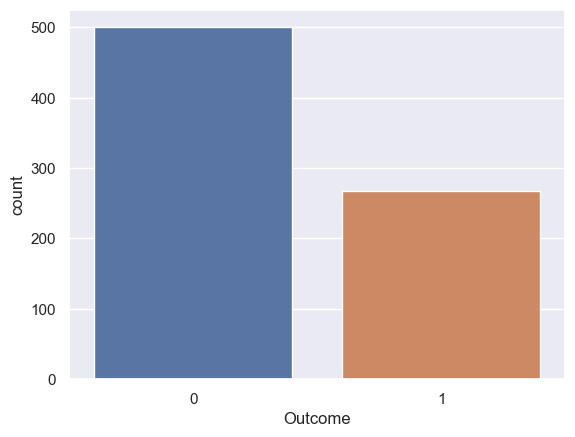

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(diabetes["Outcome"])
plt.show()

Dans les données que nous avons il y a beaucoup plus de non diabétiques que de diabétiques.


# Analyse des variables explicatives 

Maintenant que nous avons une bonne compréhension de la structure de nos données, approfondissons en explorant les fonctionnalités elles-mêmes et leur impact potentiel sur notre variable cible. Pour commencer, nous pouvons jeter un œil à la corrélation des variables explicatives :

<AxesSubplot:>

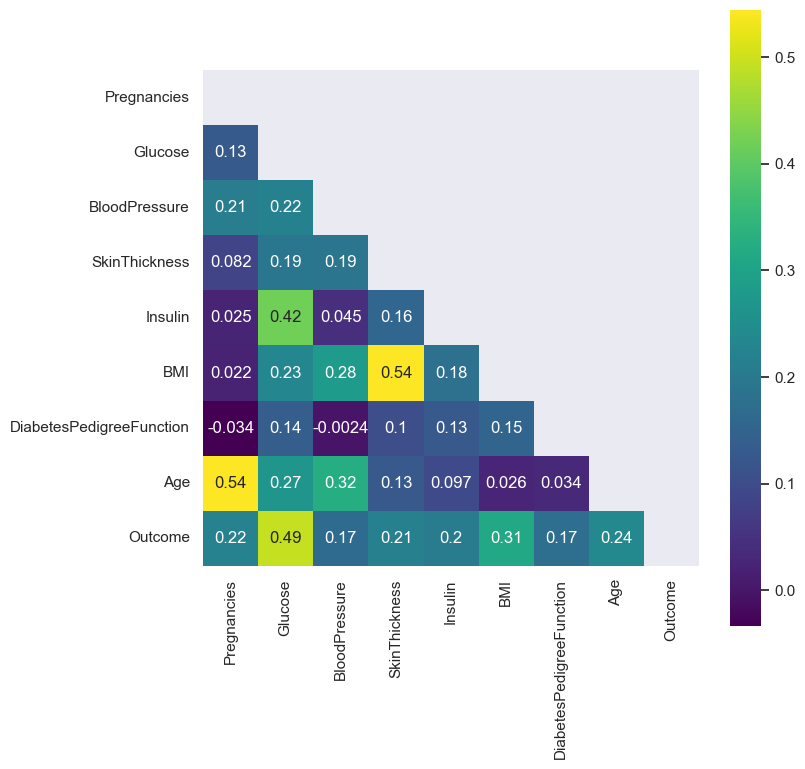

In [14]:


corr = diabetes.corr() # calcul de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool)) # définir le masque triangulaire supérieur pour la heatmap
cmap = sns.color_palette("viridis", as_cmap=True) # définition de la palette de couleur à utiliser
plt.figure(figsize=(8, 8)) # mise à jour de la taille de la figure
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True)

Il ne semble pas y avoir de corrélation forte entre les variables prédictives (corrélation<0.6). Toutes les valeurs explicatives sont donc à conserver pour générer un modèle.

# Création des données d'entrainement et de test

Récupération dans un tableau numpy des valeurs des colonnes correspondantes au variables prédictives 

In [15]:
x = pd.DataFrame(diabetes,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values

In [16]:
x.shape

(768, 8)

Récupération de la variable de sortie, reshape(-1,1) remodèle le tableau 1D obtenu aprés values, en un tableau 2D avec une seule colonne et un nombre de lignes automatiquement déduit en utilisant l'argument -1 qui signifie "inférer automatiquement le nombre de lignes".

In [17]:
y = diabetes.Outcome.values.reshape(-1,1) 

In [18]:
y.shape

(768, 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Activation,Dense
inputs = tf.keras.Input(shape=(8,))
x = tf.keras.layers.Dense(8,activation=tf.sigmoid)(inputs)
h = tf.keras.layers.Dense(4,activation=tf.sigmoid)(x)
outputs = tf.keras.layers.Dense(1,activation=tf.sigmoid)(h)
mon_model = tf.keras.Model(inputs=inputs,outputs=outputs)
mon_model.summary()

2023-04-28 10:29:33.884745: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [21]:
mon_model.compile( optimizer=tf.train.GradientDescentOptimizer(0.1),loss='mse',metrics=['mse'])
mon_model.fit(x_train,y_train,epochs=10000,batch_size=1000)

Train on 576 samples
Epoch 1/10000
576/576 [==============================] - 0s 140us/sample - loss: 0.2541 - mean_squared_error: 0.2541
Epoch 2/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2533 - mean_squared_error: 0.2533
Epoch 3/10000
576/576 [==============================] - 0s 24us/sample - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 4/10000
576/576 [==============================] - 0s 37us/sample - loss: 0.2518 - mean_squared_error: 0.2518


2023-04-28 10:30:20.203126: W tensorflow/c/c_api.cc:300] Operation '{name:'count/Assign' id:80 op device:{requested: '', assigned: ''} def:{{{node count/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count, count/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 5/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2510 - mean_squared_error: 0.2510
Epoch 6/10000
576/576 [==============================] - 0s 31us/sample - loss: 0.2503 - mean_squared_error: 0.2503
Epoch 7/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2495 - mean_squared_error: 0.2495
Epoch 8/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2488 - mean_squared_error: 0.2488
Epoch 9/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2481 - mean_squared_error: 0.2481
Epoch 10/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2474 - mean_squared_error: 0.2474
Epoch 11/10000
576/576 [==============================] - 0s 28us/sample - loss: 0.2468 - mean_squared_error: 0.2468
Epoch 12/10000
576/576 [==============================] - 0s 26us/sample - loss: 0.2461 - mean_squared_error: 0.2461
Epoch 13/10000
576/576 [==============================] - 0s 28us/sam

576/576 [==============================] - 0s 13us/sample - loss: 0.2296 - mean_squared_error: 0.2296
Epoch 76/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 77/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 78/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2294 - mean_squared_error: 0.2294
Epoch 79/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2294 - mean_squared_error: 0.2294
Epoch 80/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2293 - mean_squared_error: 0.2293
Epoch 81/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2293 - mean_squared_error: 0.2293
Epoch 82/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.2293 - mean_squared_error: 0.2293
Epoch 83/10000
576/576 [==============================] - 0s 18us/sample - loss

576/576 [==============================] - 0s 13us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 145/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 146/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 147/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 148/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 149/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 150/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 151/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2286 - mean_squared_error: 0.2286
Epoch 152/10000
576/576 [==============================] - 0s 21us/sample 

576/576 [==============================] - 0s 29us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 214/10000
576/576 [==============================] - 0s 29us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 215/10000
576/576 [==============================] - 0s 42us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 216/10000
576/576 [==============================] - 0s 38us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 217/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 218/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 219/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 220/10000
576/576 [==============================] - 0s 5us/sample - loss: 0.2285 - mean_squared_error: 0.2285
Epoch 221/10000
576/576 [==============================] - 0s 8us/sample 

576/576 [==============================] - 0s 9us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 283/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 284/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 285/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 286/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 287/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 288/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 289/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 290/10000
576/576 [==============================] - 0s 8us/sample 

576/576 [==============================] - 0s 13us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 352/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 353/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 354/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 355/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 356/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 357/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 358/10000
576/576 [==============================] - 0s 22us/sample - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 359/10000
576/576 [==============================] - 0s 27us/sampl

576/576 [==============================] - 0s 12us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 421/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 422/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 423/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 424/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 425/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 426/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 427/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 428/10000
576/576 [==============================] - 0s 7us/sample 

576/576 [==============================] - 0s 10us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 490/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 491/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 492/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 493/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 494/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 495/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 496/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 497/10000
576/576 [==============================] - 0s 6us/sample -

576/576 [==============================] - 0s 13us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 559/10000
576/576 [==============================] - 0s 22us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 560/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 561/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 562/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 563/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 564/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 565/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2280 - mean_squared_error: 0.2280
Epoch 566/10000
576/576 [==============================] - 0s 14us/sampl

576/576 [==============================] - 0s 14us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 628/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 629/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 630/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 631/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 632/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 633/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 634/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 635/10000
576/576 [==============================] - 0s 9us/sample - los

Epoch 697/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 698/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 699/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 700/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 701/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 702/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 703/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 704/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 705/10000
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 7us/sample - loss: 0.2277 - mean_squared_error: 0.2277
Epoch 767/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 768/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 769/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 770/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 771/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 772/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 773/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 774/10000
576/576 [==============================] - 0s 7us/sample - los

576/576 [==============================] - 0s 8us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 837/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 838/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 839/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 840/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 841/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 842/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 843/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 844/10000
576/576 [==============================] - 0s 8us/sample - loss

576/576 [==============================] - 0s 9us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 906/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 907/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 908/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 909/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 910/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 911/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 912/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 913/10000
576/576 [==============================] - 0s 14us/sample 

576/576 [==============================] - 0s 14us/sample - loss: 0.2272 - mean_squared_error: 0.2272
Epoch 975/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2272 - mean_squared_error: 0.2272
Epoch 976/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 977/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 978/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 979/10000
576/576 [==============================] - 0s 24us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 980/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 981/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2271 - mean_squared_error: 0.2271
Epoch 982/10000
576/576 [==============================] - 0s 10us/sample 

576/576 [==============================] - 0s 13us/sample - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 1044/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 1045/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 1046/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 1047/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 1048/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2269 - mean_squared_error: 0.2269
Epoch 1049/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2269 - mean_squared_error: 0.2269
Epoch 1050/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2269 - mean_squared_error: 0.2269
Epoch 1051/10000
576/576 [==============================] - 0s 9us/samp

576/576 [==============================] - 0s 9us/sample - loss: 0.2268 - mean_squared_error: 0.2268
Epoch 1113/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2268 - mean_squared_error: 0.2268
Epoch 1114/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1115/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1116/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1117/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1118/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1119/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 1120/10000
576/576 [==============================] - 0s 8us/samp

576/576 [==============================] - 0s 21us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1182/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1183/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1184/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1185/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1186/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1187/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1188/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2265 - mean_squared_error: 0.2265
Epoch 1189/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 8us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1251/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1252/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1253/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1254/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1255/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1256/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 1257/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2262 - mean_squared_error: 0.2262
Epoch 1258/10000
576/576 [==============================] - 0s 11us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1320/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1321/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1322/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1323/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1324/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1325/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1326/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 1327/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 9us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1389/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1390/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1391/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1392/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1393/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 1394/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2256 - mean_squared_error: 0.2256
Epoch 1395/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2256 - mean_squared_error: 0.2256
Epoch 1396/10000
576/576 [==============================] - 0s 18us/

576/576 [==============================] - 0s 7us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1458/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1459/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1460/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1461/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1462/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1463/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1464/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 1465/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 10us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1527/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1528/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1529/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1530/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1531/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1532/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1533/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2249 - mean_squared_error: 0.2249
Epoch 1534/10000
576/576 [==============================] - 0s 6us/sam

576/576 [==============================] - 0s 9us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1596/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1597/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1598/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1599/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1600/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1601/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2245 - mean_squared_error: 0.2245
Epoch 1602/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2244 - mean_squared_error: 0.2244
Epoch 1603/10000
576/576 [==============================] - 0s 14us/

576/576 [==============================] - 0s 11us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1665/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1666/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1667/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1668/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1669/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1670/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1671/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 1672/10000
576/576 [==============================] - 0s 9us/s

576/576 [==============================] - 0s 11us/sample - loss: 0.2234 - mean_squared_error: 0.2234
Epoch 1734/10000
576/576 [==============================] - 0s 25us/sample - loss: 0.2234 - mean_squared_error: 0.2234
Epoch 1735/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1736/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1737/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1738/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1739/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1740/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 1741/10000
576/576 [==============================] - 0s 10us

576/576 [==============================] - 0s 9us/sample - loss: 0.2226 - mean_squared_error: 0.2226
Epoch 1803/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2226 - mean_squared_error: 0.2226
Epoch 1804/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2226 - mean_squared_error: 0.2226
Epoch 1805/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 1806/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 1807/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 1808/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 1809/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 1810/10000
576/576 [==============================] - 0s 14us

576/576 [==============================] - 0s 15us/sample - loss: 0.2218 - mean_squared_error: 0.2218
Epoch 1872/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2218 - mean_squared_error: 0.2218
Epoch 1873/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2218 - mean_squared_error: 0.2218
Epoch 1874/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2218 - mean_squared_error: 0.2218
Epoch 1875/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2217 - mean_squared_error: 0.2217
Epoch 1876/10000
576/576 [==============================] - 0s 40us/sample - loss: 0.2217 - mean_squared_error: 0.2217
Epoch 1877/10000
576/576 [==============================] - 0s 53us/sample - loss: 0.2217 - mean_squared_error: 0.2217
Epoch 1878/10000
576/576 [==============================] - 0s 32us/sample - loss: 0.2217 - mean_squared_error: 0.2217
Epoch 1879/10000
576/576 [==============================] - 0s 28u

576/576 [==============================] - 0s 12us/sample - loss: 0.2210 - mean_squared_error: 0.2210
Epoch 1941/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2210 - mean_squared_error: 0.2210
Epoch 1942/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2210 - mean_squared_error: 0.2210
Epoch 1943/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2210 - mean_squared_error: 0.2210
Epoch 1944/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2209 - mean_squared_error: 0.2209
Epoch 1945/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2209 - mean_squared_error: 0.2209
Epoch 1946/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2209 - mean_squared_error: 0.2209
Epoch 1947/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2209 - mean_squared_error: 0.2209
Epoch 1948/10000
576/576 [==============================] - 0s 16us/s

576/576 [==============================] - 0s 11us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2010/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2011/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2012/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2013/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2014/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2015/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2016/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2201 - mean_squared_error: 0.2201
Epoch 2017/10000
576/576 [==============================] - 0s 11us

576/576 [==============================] - 0s 8us/sample - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 2079/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 2080/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2081/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2082/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2083/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2084/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2085/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2192 - mean_squared_error: 0.2192
Epoch 2086/10000
576/576 [==============================] - 0s 9us/

576/576 [==============================] - 0s 14us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2148/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2149/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2150/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2151/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2152/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2184 - mean_squared_error: 0.2184
Epoch 2153/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2183 - mean_squared_error: 0.2183
Epoch 2154/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2183 - mean_squared_error: 0.2183
Epoch 2155/10000
576/576 [==============================] - 0s 10u

576/576 [==============================] - 0s 11us/sample - loss: 0.2176 - mean_squared_error: 0.2176
Epoch 2217/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2176 - mean_squared_error: 0.2176
Epoch 2218/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2219/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2220/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2221/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2222/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2223/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 2224/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 23us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2286/10000
576/576 [==============================] - 0s 27us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2287/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2288/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2289/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2290/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 2291/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2166 - mean_squared_error: 0.2166
Epoch 2292/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2166 - mean_squared_error: 0.2166
Epoch 2293/10000
576/576 [==============================] - 0s 6us

576/576 [==============================] - 0s 11us/sample - loss: 0.2159 - mean_squared_error: 0.2159
Epoch 2355/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2159 - mean_squared_error: 0.2159
Epoch 2356/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2159 - mean_squared_error: 0.2159
Epoch 2357/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2358/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2359/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2360/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2361/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2362/10000
576/576 [==============================] - 0s 16us

576/576 [==============================] - 0s 11us/sample - loss: 0.2151 - mean_squared_error: 0.2151
Epoch 2424/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2425/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2426/10000
576/576 [==============================] - 0s 22us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2427/10000
576/576 [==============================] - 0s 22us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2428/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2429/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2430/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 2431/10000
576/576 [==============================] - 0s 10u

576/576 [==============================] - 0s 12us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2493/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2494/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2495/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2496/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2497/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 2498/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2141 - mean_squared_error: 0.2141
Epoch 2499/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2141 - mean_squared_error: 0.2141
Epoch 2500/10000
576/576 [==============================] - 0s 21u

576/576 [==============================] - 0s 13us/sample - loss: 0.2133 - mean_squared_error: 0.2133
Epoch 2562/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2563/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2564/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2565/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2566/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2567/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2132 - mean_squared_error: 0.2132
Epoch 2568/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2131 - mean_squared_error: 0.2131
Epoch 2569/10000
576/576 [==============================] - 0s 21

576/576 [==============================] - 0s 14us/sample - loss: 0.2120 - mean_squared_error: 0.2120
Epoch 2631/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2120 - mean_squared_error: 0.2120
Epoch 2632/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2120 - mean_squared_error: 0.2120
Epoch 2633/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2120 - mean_squared_error: 0.2120
Epoch 2634/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2119 - mean_squared_error: 0.2119
Epoch 2635/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2119 - mean_squared_error: 0.2119
Epoch 2636/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2119 - mean_squared_error: 0.2119
Epoch 2637/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2119 - mean_squared_error: 0.2119
Epoch 2638/10000
576/576 [==============================] - 0s 8us

576/576 [==============================] - 0s 10us/sample - loss: 0.2109 - mean_squared_error: 0.2109
Epoch 2700/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2109 - mean_squared_error: 0.2109
Epoch 2701/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2109 - mean_squared_error: 0.2109
Epoch 2702/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2109 - mean_squared_error: 0.2109
Epoch 2703/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2109 - mean_squared_error: 0.2109
Epoch 2704/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2108 - mean_squared_error: 0.2108
Epoch 2705/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2108 - mean_squared_error: 0.2108
Epoch 2706/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2108 - mean_squared_error: 0.2108
Epoch 2707/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 12us/sample - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 2769/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 2770/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 2771/10000
576/576 [==============================] - 0s 24us/sample - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 2772/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 2773/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 2774/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 2775/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 2776/10000
576/576 [==============================] - 0s 8us

576/576 [==============================] - 0s 27us/sample - loss: 0.2090 - mean_squared_error: 0.2090
Epoch 2838/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2090 - mean_squared_error: 0.2090
Epoch 2839/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2090 - mean_squared_error: 0.2090
Epoch 2840/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2089 - mean_squared_error: 0.2089
Epoch 2841/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2089 - mean_squared_error: 0.2089
Epoch 2842/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.2089 - mean_squared_error: 0.2089
Epoch 2843/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2089 - mean_squared_error: 0.2089
Epoch 2844/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2089 - mean_squared_error: 0.2089
Epoch 2845/10000
576/576 [==============================] - 0s 12us

576/576 [==============================] - 0s 44us/sample - loss: 0.2082 - mean_squared_error: 0.2082
Epoch 2907/10000
576/576 [==============================] - 0s 25us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2908/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2909/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2910/10000
576/576 [==============================] - 0s 22us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2911/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2912/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2913/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 2914/10000
576/576 [==============================] - 0s 11

576/576 [==============================] - 0s 10us/sample - loss: 0.2074 - mean_squared_error: 0.2074
Epoch 2976/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2074 - mean_squared_error: 0.2074
Epoch 2977/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2074 - mean_squared_error: 0.2074
Epoch 2978/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 2979/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 2980/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 2981/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 2982/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 2983/10000
576/576 [==============================] - 0s 7us

576/576 [==============================] - 0s 17us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3045/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3046/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3047/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3048/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3049/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3050/10000
576/576 [==============================] - 0s 44us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3051/10000
576/576 [==============================] - 0s 32us/sample - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 3052/10000
576/576 [==============================] - 0s 21

576/576 [==============================] - 0s 12us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3114/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3115/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3116/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3117/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3118/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3119/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3120/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 3121/10000
576/576 [==============================] - 0s 10u

576/576 [==============================] - 0s 10us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3183/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3184/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3185/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3186/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3187/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3188/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 3189/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2051 - mean_squared_error: 0.2051
Epoch 3190/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 14us/sample - loss: 0.2041 - mean_squared_error: 0.2041
Epoch 3252/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 3253/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2040 - mean_squared_error: 0.2040
Epoch 3254/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 3255/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2040 - mean_squared_error: 0.2040
Epoch 3256/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 3257/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2040 - mean_squared_error: 0.2040
Epoch 3258/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2042 - mean_squared_error: 0.2042
Epoch 3259/10000
576/576 [==============================] - 0s 8us/

576/576 [==============================] - 0s 24us/sample - loss: 0.2035 - mean_squared_error: 0.2035
Epoch 3321/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2033 - mean_squared_error: 0.2033
Epoch 3322/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.2035 - mean_squared_error: 0.2035
Epoch 3323/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2033 - mean_squared_error: 0.2033
Epoch 3324/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2034 - mean_squared_error: 0.2034
Epoch 3325/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2032 - mean_squared_error: 0.2032
Epoch 3326/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2034 - mean_squared_error: 0.2034
Epoch 3327/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.2032 - mean_squared_error: 0.2032
Epoch 3328/10000
576/576 [==============================] - 0s 17

Epoch 3389/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2018 - mean_squared_error: 0.2018
Epoch 3390/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2020 - mean_squared_error: 0.2020
Epoch 3391/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.2021 - mean_squared_error: 0.2021
Epoch 3392/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2026 - mean_squared_error: 0.2026
Epoch 3393/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2022 - mean_squared_error: 0.2022
Epoch 3394/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 3395/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2018 - mean_squared_error: 0.2018
Epoch 3396/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2018 - mean_squared_error: 0.2018
Epoch 3397/10000
576/576 [=======================

576/576 [==============================] - 0s 13us/sample - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 3458/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2001 - mean_squared_error: 0.2001
Epoch 3459/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1995 - mean_squared_error: 0.1995
Epoch 3460/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.1995 - mean_squared_error: 0.1995
Epoch 3461/10000
576/576 [==============================] - 0s 25us/sample - loss: 0.2001 - mean_squared_error: 0.2001
Epoch 3462/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 3463/10000
576/576 [==============================] - 0s 25us/sample - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 3464/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 3465/10000
576/576 [==============================] - 0s 15

576/576 [==============================] - 0s 16us/sample - loss: 0.1974 - mean_squared_error: 0.1974
Epoch 3527/10000
576/576 [==============================] - 0s 24us/sample - loss: 0.1974 - mean_squared_error: 0.1974
Epoch 3528/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1974 - mean_squared_error: 0.1974
Epoch 3529/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 3530/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1979 - mean_squared_error: 0.1979
Epoch 3531/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 3532/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.1979 - mean_squared_error: 0.1979
Epoch 3533/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1973 - mean_squared_error: 0.1973
Epoch 3534/10000
576/576 [==============================] - 0s 18

576/576 [==============================] - 0s 10us/sample - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 3596/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 3597/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 3598/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 3599/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 3600/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 3601/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 3602/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 3603/10000
576/576 [==============================] - 0s 12u

576/576 [==============================] - 0s 15us/sample - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 3665/10000
576/576 [==============================] - 0s 41us/sample - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 3666/10000
576/576 [==============================] - 0s 45us/sample - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 3667/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1971 - mean_squared_error: 0.1971
Epoch 3668/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 3669/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 3670/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.2031 - mean_squared_error: 0.2031
Epoch 3671/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 3672/10000
576/576 [==============================] - 0s 17u

Epoch 3733/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 3734/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 3735/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 3736/10000
576/576 [==============================] - 0s 5us/sample - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 3737/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.2037 - mean_squared_error: 0.2037
Epoch 3738/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1969 - mean_squared_error: 0.1969
Epoch 3739/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 3740/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1980 - mean_squared_error: 0.1980
Epoch 3741/10000
576/576 [=======================

Epoch 3802/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 3803/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 3804/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1974 - mean_squared_error: 0.1974
Epoch 3805/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 3806/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 3807/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 3808/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 3809/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1970 - mean_squared_error: 0.1970
Epoch 3810/10000
576/576 [=========================

Epoch 3871/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3872/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 3873/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3874/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3875/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3876/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 3877/10000
576/576 [==============================] - 0s 84us/sample - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 3878/10000
576/576 [==============================] - 0s 54us/sample - loss: 0.2026 - mean_squared_error: 0.2026
Epoch 3879/10000
576/576 [========================

576/576 [==============================] - 0s 8us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3941/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 3942/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2034 - mean_squared_error: 0.2034
Epoch 3943/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1958 - mean_squared_error: 0.1958
Epoch 3944/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 3945/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1984 - mean_squared_error: 0.1984
Epoch 3946/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 3947/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.2010 - mean_squared_error: 0.2010
Epoch 3948/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 14us/sample - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4010/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 4011/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4012/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4013/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4014/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4015/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4016/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4017/10000
576/576 [==============================] - 0s 7us

576/576 [==============================] - 0s 19us/sample - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 4079/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 4080/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 4081/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1977 - mean_squared_error: 0.1977
Epoch 4082/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 4083/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 4084/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 4085/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1989 - mean_squared_error: 0.1989
Epoch 4086/10000
576/576 [==============================] - 0s 17

576/576 [==============================] - 0s 10us/sample - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4148/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4149/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 4150/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1986 - mean_squared_error: 0.1986
Epoch 4151/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 4152/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1958 - mean_squared_error: 0.1958
Epoch 4153/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 4154/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 4155/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 10us/sample - loss: 0.1990 - mean_squared_error: 0.1990
Epoch 4217/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 4218/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 4219/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 4220/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.2029 - mean_squared_error: 0.2029
Epoch 4221/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1925 - mean_squared_error: 0.1925
Epoch 4222/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1926 - mean_squared_error: 0.1926
Epoch 4223/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1926 - mean_squared_error: 0.1926
Epoch 4224/10000
576/576 [==============================] - 0s 7us

576/576 [==============================] - 0s 10us/sample - loss: 0.2031 - mean_squared_error: 0.2031
Epoch 4286/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 4287/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1926 - mean_squared_error: 0.1926
Epoch 4288/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4289/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 4290/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2004 - mean_squared_error: 0.2004
Epoch 4291/10000
576/576 [==============================] - 0s 37us/sample - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 4292/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.1929 - mean_squared_error: 0.1929
Epoch 4293/10000
576/576 [==============================] - 0s 47u

576/576 [==============================] - 0s 11us/sample - loss: 0.1916 - mean_squared_error: 0.1916
Epoch 4355/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1915 - mean_squared_error: 0.1915
Epoch 4356/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1915 - mean_squared_error: 0.1915
Epoch 4357/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1919 - mean_squared_error: 0.1919
Epoch 4358/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4359/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 4360/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.2000 - mean_squared_error: 0.2000
Epoch 4361/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 4362/10000
576/576 [==============================] - 0s 10us/s

576/576 [==============================] - 0s 17us/sample - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 4424/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 4425/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 4426/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.2011 - mean_squared_error: 0.2011
Epoch 4427/10000
576/576 [==============================] - 0s 36us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 4428/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.1914 - mean_squared_error: 0.1914
Epoch 4429/10000
576/576 [==============================] - 0s 25us/sample - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 4430/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 4431/10000
576/576 [==============================] - 0s 14u

576/576 [==============================] - 0s 6us/sample - loss: 0.2007 - mean_squared_error: 0.2007
Epoch 4493/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4494/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4495/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 4496/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 4497/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 4498/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1977 - mean_squared_error: 0.1977
Epoch 4499/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2007 - mean_squared_error: 0.2007
Epoch 4500/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 8us/sample - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 4562/10000
576/576 [==============================] - 0s 32us/sample - loss: 0.1973 - mean_squared_error: 0.1973
Epoch 4563/10000
576/576 [==============================] - 0s 95us/sample - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 4564/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 4565/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 4566/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4567/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 4568/10000
576/576 [==============================] - 0s 27us/sample - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 4569/10000
576/576 [==============================] - 0s 31us

576/576 [==============================] - 0s 9us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 4631/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 4632/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 4633/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 4634/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1930 - mean_squared_error: 0.1930
Epoch 4635/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 4636/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 4637/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1988 - mean_squared_error: 0.1988
Epoch 4638/10000
576/576 [==============================] - 0s 12us/s

576/576 [==============================] - 0s 12us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 4700/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4701/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 4702/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4703/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 4704/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 4705/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 4706/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1914 - mean_squared_error: 0.1914
Epoch 4707/10000
576/576 [==============================] - 0s 10us/sam

576/576 [==============================] - 0s 8us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4769/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 4770/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4771/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 4772/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4773/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 4774/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4775/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 4776/10000
576/576 [==============================] - 0s 9us/samp

576/576 [==============================] - 0s 9us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 4838/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4839/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 4840/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4841/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 4842/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4843/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 4844/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 4845/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 8us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 4907/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 4908/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 4909/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 4910/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 4911/10000
576/576 [==============================] - 0s 5us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 4912/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 4913/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 4914/10000
576/576 [==============================] - 0s 13us/sa

576/576 [==============================] - 0s 6us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 4976/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 4977/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 4978/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1906 - mean_squared_error: 0.1906
Epoch 4979/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 4980/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 4981/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 4982/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 4983/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 5045/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1925 - mean_squared_error: 0.1925
Epoch 5046/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 5047/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 5048/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 5049/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5050/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5051/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5052/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 16us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 5114/10000
576/576 [==============================] - 0s 28us/sample - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 5115/10000
576/576 [==============================] - 0s 32us/sample - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 5116/10000
576/576 [==============================] - 0s 24us/sample - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 5117/10000
576/576 [==============================] - 0s 34us/sample - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 5118/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 5119/10000
576/576 [==============================] - 0s 49us/sample - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 5120/10000
576/576 [==============================] - 0s 35us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 5121/10000
576/576 [==============================] - 0s 18

576/576 [==============================] - 0s 9us/sample - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 5183/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 5184/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 5185/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2012 - mean_squared_error: 0.2012
Epoch 5186/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 5187/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.2020 - mean_squared_error: 0.2020
Epoch 5188/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5189/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 5190/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 23us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5252/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 5253/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 5254/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 5255/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 5256/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 5257/10000
576/576 [==============================] - 0s 18us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 5258/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1919 - mean_squared_error: 0.1919
Epoch 5259/10000
576/576 [==============================] - 0s 9us/

576/576 [==============================] - 0s 8us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 5321/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 5322/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 5323/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 5324/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 5325/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 5326/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 5327/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1999 - mean_squared_error: 0.1999
Epoch 5328/10000
576/576 [==============================] - 0s 10us/samp

576/576 [==============================] - 0s 8us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 5390/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 5391/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 5392/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 5393/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1996 - mean_squared_error: 0.1996
Epoch 5394/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 5395/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.2000 - mean_squared_error: 0.2000
Epoch 5396/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 5397/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 8us/sample - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 5459/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1930 - mean_squared_error: 0.1930
Epoch 5460/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1988 - mean_squared_error: 0.1988
Epoch 5461/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 5462/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 5463/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 5464/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1970 - mean_squared_error: 0.1970
Epoch 5465/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 5466/10000
576/576 [==============================] - 0s 8us/sample

576/576 [==============================] - 0s 7us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 5528/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 5529/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 5530/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5531/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 5532/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 5533/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1903 - mean_squared_error: 0.1903
Epoch 5534/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1918 - mean_squared_error: 0.1918
Epoch 5535/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 8us/sample - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 5597/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1994 - mean_squared_error: 0.1994
Epoch 5598/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 5599/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 5600/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 5601/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 5602/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 5603/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2001 - mean_squared_error: 0.2001
Epoch 5604/10000
576/576 [==============================] - 0s 7us/sa

576/576 [==============================] - 0s 8us/sample - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 5666/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 5667/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1996 - mean_squared_error: 0.1996
Epoch 5668/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 5669/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 5670/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 5671/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 5672/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 5673/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 6us/sample - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 5735/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1901 - mean_squared_error: 0.1901
Epoch 5736/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1928 - mean_squared_error: 0.1928
Epoch 5737/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 5738/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 5739/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 5740/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1893 - mean_squared_error: 0.1893
Epoch 5741/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5742/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 16us/sample - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 5804/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 5805/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1919 - mean_squared_error: 0.1919
Epoch 5806/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 5807/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 5808/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 5809/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 5810/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 5811/10000
576/576 [==============================] - 0s 7us/samp

576/576 [==============================] - 0s 6us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 5873/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 5874/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 5875/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 5876/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 5877/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 5878/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 5879/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 5880/10000
576/576 [==============================] - 0s 9us/sample

576/576 [==============================] - 0s 9us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 5942/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 5943/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 5944/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 5945/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 5946/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 5947/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 5948/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 5949/10000
576/576 [==============================] - 0s 7us/s

576/576 [==============================] - 0s 7us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 6011/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1893 - mean_squared_error: 0.1893
Epoch 6012/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 6013/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 6014/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 6015/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 6016/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 6017/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 6018/10000
576/576 [==============================] - 0s 6us/samp

576/576 [==============================] - 0s 8us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 6080/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 6081/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 6082/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 6083/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 6084/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1964 - mean_squared_error: 0.1964
Epoch 6085/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 6086/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 6087/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 8us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 6149/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 6150/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 6151/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 6152/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 6153/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1916 - mean_squared_error: 0.1916
Epoch 6154/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6155/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6156/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 6218/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 6219/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6220/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1893 - mean_squared_error: 0.1893
Epoch 6221/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6222/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 6223/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 6224/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 6225/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 9us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 6287/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 6288/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 6289/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 6290/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 6291/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6292/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 6293/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1918 - mean_squared_error: 0.1918
Epoch 6294/10000
576/576 [==============================] - 0s 13us/s

576/576 [==============================] - 0s 9us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 6356/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 6357/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6358/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 6359/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 6360/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 6361/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 6362/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 6363/10000
576/576 [==============================] - 0s 19us/

576/576 [==============================] - 0s 10us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 6425/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 6426/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 6427/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 6428/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 6429/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 6430/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 6431/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 6432/10000
576/576 [==============================] - 0s 8us/s

576/576 [==============================] - 0s 11us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6494/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 6495/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 6496/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 6497/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 6498/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6499/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 6500/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 6501/10000
576/576 [==============================] - 0s 9us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 6563/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1901 - mean_squared_error: 0.1901
Epoch 6564/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 6565/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 6566/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1906 - mean_squared_error: 0.1906
Epoch 6567/10000
576/576 [==============================] - 0s 20us/sample - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 6568/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 6569/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 6570/10000
576/576 [==============================] - 0s 10us/

576/576 [==============================] - 0s 12us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 6632/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 6633/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6634/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 6635/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6636/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1915 - mean_squared_error: 0.1915
Epoch 6637/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 6638/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6639/10000
576/576 [==============================] - 0s 9us

576/576 [==============================] - 0s 9us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 6701/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6702/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 6703/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 6704/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 6705/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1901 - mean_squared_error: 0.1901
Epoch 6706/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1893 - mean_squared_error: 0.1893
Epoch 6707/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 6708/10000
576/576 [==============================] - 0s 7us/samp

576/576 [==============================] - 0s 8us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 6770/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 6771/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 6772/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 6773/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 6774/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 6775/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 6776/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 6777/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 13us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6839/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 6840/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1950 - mean_squared_error: 0.1950
Epoch 6841/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6842/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 6843/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 6844/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6845/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 6846/10000
576/576 [==============================] - 0s 9us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 6908/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 6909/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 6910/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 6911/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 6912/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 6913/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6914/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 6915/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 8us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 6977/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 6978/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 6979/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6980/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 6981/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 6982/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 6983/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 6984/10000
576/576 [==============================] - 0s 8us/sample

576/576 [==============================] - 0s 15us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 7046/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7047/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 7048/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 7049/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7050/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 7051/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 7052/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 7053/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 10us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 7115/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 7116/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 7117/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7118/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1910 - mean_squared_error: 0.1910
Epoch 7119/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 7120/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 7121/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 7122/10000
576/576 [==============================] - 0s 9us/s

576/576 [==============================] - 0s 7us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 7184/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 7185/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 7186/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 7187/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 7188/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1926 - mean_squared_error: 0.1926
Epoch 7189/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7190/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7191/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 7253/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 7254/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 7255/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 7256/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7257/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7258/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7259/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7260/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 7us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 7322/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1906 - mean_squared_error: 0.1906
Epoch 7323/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 7324/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7325/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 7326/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 7327/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 7328/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 7329/10000
576/576 [==============================] - 0s 10us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7391/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7392/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7393/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 7394/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 7395/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 7396/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 7397/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 7398/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 8us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7460/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1886 - mean_squared_error: 0.1886
Epoch 7461/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1903 - mean_squared_error: 0.1903
Epoch 7462/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 7463/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7464/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7465/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 7466/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 7467/10000
576/576 [==============================] - 0s 8us/sam

576/576 [==============================] - 0s 11us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7529/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7530/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 7531/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 7532/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 7533/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7534/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7535/10000
576/576 [==============================] - 0s 19us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7536/10000
576/576 [==============================] - 0s 9us

576/576 [==============================] - 0s 10us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 7598/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 7599/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 7600/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 7601/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 7602/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 7603/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 7604/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 7605/10000
576/576 [==============================] - 0s 14u

576/576 [==============================] - 0s 16us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 7667/10000
576/576 [==============================] - 0s 23us/sample - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 7668/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7669/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7670/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 7671/10000
576/576 [==============================] - 0s 21us/sample - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 7672/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1929 - mean_squared_error: 0.1929
Epoch 7673/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7674/10000
576/576 [==============================] - 0s 9us/

576/576 [==============================] - 0s 9us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 7736/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1913 - mean_squared_error: 0.1913
Epoch 7737/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7738/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 7739/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 7740/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7741/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 7742/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 7743/10000
576/576 [==============================] - 0s 8us/sam

576/576 [==============================] - 0s 43us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7805/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 7806/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7807/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1893 - mean_squared_error: 0.1893
Epoch 7808/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 7809/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 7810/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 7811/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 7812/10000
576/576 [==============================] - 0s 12us/sa

576/576 [==============================] - 0s 7us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 7874/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 7875/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 7876/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7877/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 7878/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 7879/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 7880/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 7881/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 9us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 7943/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 7944/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 7945/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 7946/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 7947/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1886 - mean_squared_error: 0.1886
Epoch 7948/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1901 - mean_squared_error: 0.1901
Epoch 7949/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 7950/10000
576/576 [==============================] - 0s 7us/sa

576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8012/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8013/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 8014/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 8015/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 8016/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 8017/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 8018/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 8019/10000
576/576 [==============================] - 0s 11us/sa

576/576 [==============================] - 0s 7us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 8081/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8082/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8083/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 8084/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 8085/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 8086/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 8087/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 8088/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 7us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 8150/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 8151/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 8152/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8153/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 8154/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 8155/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8156/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 8157/10000
576/576 [==============================] - 0s 6us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 8219/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 8220/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 8221/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 8222/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8223/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 8224/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 8225/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 8226/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 8288/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 8289/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 8290/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 8291/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8292/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 8293/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 8294/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1901 - mean_squared_error: 0.1901
Epoch 8295/10000
576/576 [==============================] - 0s 6us/samp

576/576 [==============================] - 0s 9us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 8357/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 8358/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 8359/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 8360/10000
576/576 [==============================] - 0s 17us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8361/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 8362/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1914 - mean_squared_error: 0.1914
Epoch 8363/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 8364/10000
576/576 [==============================] - 0s 6us/sam

576/576 [==============================] - 0s 8us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 8426/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 8427/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8428/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8429/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 8430/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 8431/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 8432/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 8433/10000
576/576 [==============================] - 0s 10us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 8495/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 8496/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 8497/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 8498/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8499/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 8500/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 8501/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 8502/10000
576/576 [==============================] - 0s 7us/s

576/576 [==============================] - 0s 8us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 8564/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 8565/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 8566/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 8567/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 8568/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 8569/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 8570/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8571/10000
576/576 [==============================] - 0s 11us/samp

576/576 [==============================] - 0s 7us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8633/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8634/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8635/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8636/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 8637/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 8638/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 8639/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 8640/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 11us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 8702/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 8703/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 8704/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 8705/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 8706/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 8707/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 8708/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 8709/10000
576/576 [==============================] - 0s 8us/sampl

576/576 [==============================] - 0s 7us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8771/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8772/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 8773/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 8774/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 8775/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8776/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 8777/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 8778/10000
576/576 [==============================] - 0s 7us/samp

576/576 [==============================] - 0s 8us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 8840/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 8841/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 8842/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 8843/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 8844/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 8845/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 8846/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8847/10000
576/576 [==============================] - 0s 6us/sa

576/576 [==============================] - 0s 9us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8909/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1886 - mean_squared_error: 0.1886
Epoch 8910/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8911/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 8912/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 8913/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 8914/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 8915/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 8916/10000
576/576 [==============================] - 0s 7us/sample

576/576 [==============================] - 0s 7us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 8978/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 8979/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 8980/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1867 - mean_squared_error: 0.1867
Epoch 8981/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1867 - mean_squared_error: 0.1867
Epoch 8982/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 8983/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1884 - mean_squared_error: 0.1884
Epoch 8984/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 8985/10000
576/576 [==============================] - 0s 7us/sam

576/576 [==============================] - 0s 11us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 9047/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9048/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 9049/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 9050/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 9051/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9052/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 9053/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 9054/10000
576/576 [==============================] - 0s 9us/samp

576/576 [==============================] - 0s 9us/sample - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 9116/10000
576/576 [==============================] - 0s 13us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 9117/10000
576/576 [==============================] - 0s 16us/sample - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 9118/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9119/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 9120/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 9121/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 9122/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 9123/10000
576/576 [==============================] - 0s 9us/sam

576/576 [==============================] - 0s 13us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9185/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9186/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9187/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9188/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9189/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9190/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9191/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1867 - mean_squared_error: 0.1867
Epoch 9192/10000
576/576 [==============================] - 0s 6us/samp

576/576 [==============================] - 0s 7us/sample - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 9254/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 9255/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 9256/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 9257/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1876 - mean_squared_error: 0.1876
Epoch 9258/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9259/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 9260/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 9261/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 9323/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 9324/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9325/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 9326/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9327/10000
576/576 [==============================] - 0s 12us/sample - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 9328/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 9329/10000
576/576 [==============================] - 0s 14us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9330/10000
576/576 [==============================] - 0s 7us/samp

576/576 [==============================] - 0s 11us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9392/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 9393/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 9394/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9395/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9396/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 9397/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 9398/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9399/10000
576/576 [==============================] - 0s 8us/sa

576/576 [==============================] - 0s 7us/sample - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 9461/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 9462/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9463/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 9464/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1862 - mean_squared_error: 0.1862
Epoch 9465/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 9466/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 9467/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1855 - mean_squared_error: 0.1855
Epoch 9468/10000
576/576 [==============================] - 0s 7us/sampl

576/576 [==============================] - 0s 9us/sample - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 9530/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1850 - mean_squared_error: 0.1850
Epoch 9531/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9532/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9533/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9534/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1850 - mean_squared_error: 0.1850
Epoch 9535/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 9536/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1855 - mean_squared_error: 0.1855
Epoch 9537/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 10us/sample - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 9599/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 9600/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 9601/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 9602/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 9603/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9604/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 9605/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 9606/10000
576/576 [==============================] - 0s 7us/sam

576/576 [==============================] - 0s 10us/sample - loss: 0.1873 - mean_squared_error: 0.1873
Epoch 9668/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1848 - mean_squared_error: 0.1848
Epoch 9669/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 9670/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 9671/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1847 - mean_squared_error: 0.1847
Epoch 9672/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 9673/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 9674/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1847 - mean_squared_error: 0.1847
Epoch 9675/10000
576/576 [==============================] - 0s 11us/sa

576/576 [==============================] - 0s 8us/sample - loss: 0.1843 - mean_squared_error: 0.1843
Epoch 9737/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1847 - mean_squared_error: 0.1847
Epoch 9738/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1853 - mean_squared_error: 0.1853
Epoch 9739/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 9740/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 9741/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 9742/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 9743/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 9744/10000
576/576 [==============================] - 0s 6us/sample

576/576 [==============================] - 0s 7us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9806/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9807/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9808/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9809/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9810/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9811/10000
576/576 [==============================] - 0s 8us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9812/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9813/10000
576/576 [==============================] - 0s 9us/sampl

576/576 [==============================] - 0s 8us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9875/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 9876/10000
576/576 [==============================] - 0s 11us/sample - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 9877/10000
576/576 [==============================] - 0s 15us/sample - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 9878/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9879/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1852 - mean_squared_error: 0.1852
Epoch 9880/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1846 - mean_squared_error: 0.1846
Epoch 9881/10000
576/576 [==============================] - 0s 10us/sample - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 9882/10000
576/576 [==============================] - 0s 9us/sam

576/576 [==============================] - 0s 7us/sample - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 9944/10000
576/576 [==============================] - 0s 9us/sample - loss: 0.1848 - mean_squared_error: 0.1848
Epoch 9945/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9946/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 9947/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1841 - mean_squared_error: 0.1841
Epoch 9948/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1839 - mean_squared_error: 0.1839
Epoch 9949/10000
576/576 [==============================] - 0s 6us/sample - loss: 0.1841 - mean_squared_error: 0.1841
Epoch 9950/10000
576/576 [==============================] - 0s 7us/sample - loss: 0.1858 - mean_squared_error: 0.1858
Epoch 9951/10000
576/576 [==============================] - 0s 8us/sample

In [24]:
y_pred = mon_model.predict(x_test)

/Users/brunoboissie/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-04-28 10:45:28.796564: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_2/Sigmoid' id:65 op device:{requested: '', assigned: ''} def:{{{node dense_2/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [26]:
y_test

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [27]:
y_pred

array([[0.67008996],
       [0.27930814],
       [0.14700313],
       [0.66893077],
       [0.17432189],
       [0.20884779],
       [0.42474177],
       [0.67008865],
       [0.59091496],
       [0.12550263],
       [0.59091085],
       [0.6700773 ],
       [0.27932048],
       [0.12786184],
       [0.12547913],
       [0.14455178],
       [0.6700887 ],
       [0.15111499],
       [0.27761513],
       [0.66560084],
       [0.27944466],
       [0.27933532],
       [0.1254813 ],
       [0.12423781],
       [0.12580061],
       [0.7587741 ],
       [0.12548023],
       [0.27976006],
       [0.12898038],
       [0.17074987],
       [0.6643969 ],
       [0.21027906],
       [0.27874246],
       [0.59165514],
       [0.6680031 ],
       [0.6700887 ],
       [0.27932805],
       [0.2089866 ],
       [0.60028   ],
       [0.67008746],
       [0.4007839 ],
       [0.12564202],
       [0.20900808],
       [0.6700887 ],
       [0.59091496],
       [0.12553392],
       [0.20887868],
       [0.663

In [28]:
import numpy as np
dist = np.linalg.norm(y_pred-y_test)

In [29]:
dist

6.343058842919608